## 1. Random Forest importance

Here, it is demonstrated how to select features based on tree importance using a regression and classification dataset.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

## Classification

In [2]:
# load dataset
data = pd.read_csv('../dataset_2.csv')
data.shape

(50000, 109)

In [3]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit.

In [4]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

### Select features with tree importance

In [7]:
sel_ = SelectFromModel(RandomForestClassifier(n_estimators=10, random_state=10))

sel_.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10,
                                                 random_state=10))

In [8]:
selected_feat = X_train.columns[(sel_.get_support())]

len(selected_feat)

27

In [9]:
selected_feat

Index(['var_1', 'var_2', 'var_6', 'var_9', 'var_13', 'var_15', 'var_16',
       'var_17', 'var_20', 'var_21', 'var_30', 'var_34', 'var_37', 'var_55',
       'var_60', 'var_67', 'var_69', 'var_70', 'var_71', 'var_82', 'var_87',
       'var_88', 'var_95', 'var_96', 'var_99', 'var_103', 'var_108'],
      dtype='object')

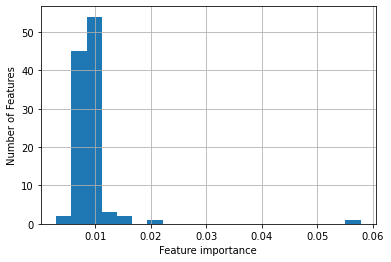

In [9]:
# and now let's plot the distribution of importances

pd.Series(sel_.estimator_.feature_importances_.ravel()).hist(bins=20)
plt.xlabel('Feature importance')
plt.ylabel('Number of Features')
plt.show()

In [10]:
print('total features: {}'.format((X_train.shape[1])))

print('selected features: {}'.format(len(selected_feat)))

print(
    'features with importance greater than the mean importance of all features: {}'.format(
        np.sum(sel_.estimator_.feature_importances_ >
               sel_.estimator_.feature_importances_.mean())))

total features: 108
selected features: 27
features with importance greater than the mean importance of all features: 27


A few things to note:

- If we change the parameters of the tree, we may obtain different features
- How many features to select is somewhat arbitrary

## Regression

In [12]:
# load dataset
data = pd.read_csv('../houseprice.csv')
data.shape

(1460, 81)

In [13]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [14]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [15]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

### Select Features with tree importance

In [16]:
sel_ = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=10))
sel_.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(random_state=10))

In [17]:
# a list and count the selected features
selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

5

In [18]:
print('total features: {}'.format((X_train.shape[1])))

print('selected features: {}'.format(len(selected_feat)))

print(
    'features with coefficients greater than the mean coefficient: {}'.format(
        np.sum(sel_.estimator_.feature_importances_ >
               sel_.estimator_.feature_importances_.mean())))

total features: 37
selected features: 5
features with coefficients greater than the mean coefficient: 5


Selecting features by using tree derived feature importance is a very straightforward, fast and generally accurate way of selecting good features for machine learning. However, correlated features will show in a tree similar importance, but lower than compared to what their importance would be if the tree was built without the correlated counterparts. In situations like this, it might be better to select features recursively, rather than altogether it has been just done.

## 2. Recursive Feature Selection using Random Forests importance

Random Forests assign equal or similar importance to features that are highly correlated. In addition, when features are correlated, the importance assigned is lower than the importance attributed to the feature itself, should the tree be built without the correlated counterparts.

Therefore, instead of eliminating features based on importance by brute force it is better to remove one feature at a time, and recalculating the importance on each round. This procedure is called Recursive Feature Elimination (RFE)

RFE is a hybrid between embedded and wrapper methods: it is based on computation derived when fitting the model, but it also requires fitting several models.

The cycle is as follows:

- Build Random Forests using all features
- Remove least important feature
- Build Random Forests and recalculate importance
- Repeat until a criteria is met

In this situation, when a feature that is highly correlated to another one is removed, then, the importance of the remaining feature increases. This may lead to a better feature space selection. On the downside, building several Random Forests is quite time and compute resource consuming, in particular if the dataset contains a high number of features.

In [63]:
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import VarianceThreshold

In [47]:
# load dataset
data = pd.read_csv('../dataset_2.csv')
data.shape

(50000, 109)

In [48]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In [49]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

### Select features recursively

In [50]:
sel_ = RFE(RandomForestClassifier(n_estimators=10, random_state=10), n_features_to_select=27)
sel_.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(n_estimators=10, random_state=10),
    n_features_to_select=27)

In [51]:
# selected features

selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

27

In [52]:
# let's display the list of features
selected_feat

Index(['var_4', 'var_14', 'var_21', 'var_25', 'var_30', 'var_31', 'var_34',
       'var_38', 'var_41', 'var_46', 'var_53', 'var_55', 'var_56', 'var_70',
       'var_71', 'var_73', 'var_79', 'var_82', 'var_86', 'var_87', 'var_88',
       'var_90', 'var_92', 'var_93', 'var_96', 'var_104', 'var_108'],
      dtype='object')

In [53]:
# select previously selected features for further comparing

previous_lecture_selected_features = [
    'var_1', 'var_2', 'var_6', 'var_9', 'var_13', 'var_15', 'var_16', 'var_17',
    'var_20', 'var_21', 'var_30', 'var_34', 'var_37', 'var_55', 'var_60',
    'var_67', 'var_69', 'var_70', 'var_71', 'var_82', 'var_87', 'var_88',
    'var_95', 'var_96', 'var_99', 'var_103', 'var_108'
]

### Compare performance of feature subsets

In [54]:
# a function to build random forests and compare
# their performance in train and test sets

def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [55]:
# features selected recursively
run_randomForests(X_train[selected_feat],
                  X_test[selected_feat],
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.7046591498448564
Test set
Random Forests roc-auc: 0.6904472637540937


In [56]:
# features selected altogether
run_randomForests(X_train[previous_lecture_selected_features],
                  X_test[previous_lecture_selected_features],
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.7126509093226299
Test set
Random Forests roc-auc: 0.7009195513033531


We see that RFE did not return a better subset of features. The performance of the model built using the variables selected directly from the first RandomForest was enough to find a good subset of features.

## 3. Feature selection with decision trees in pipelines

In [64]:
data = pd.read_csv('../dataset_1.csv')
data.shape

(50000, 301)

In [65]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 300), (15000, 300))

In [66]:
# keep a copy for further comperison

X_train_original = X_train.copy()
X_test_original = X_test.copy()

### Remove constant features

In [67]:
constant_features = [
    feat for feat in X_train.columns if X_train[feat].std() == 0
]

X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 266), (15000, 266))

### Remove quasi-constant features

In [68]:
sel = VarianceThreshold(threshold=0.01)  

sel.fit(X_train)
sum(sel.get_support())

215

In [69]:
features_to_keep = X_train.columns[sel.get_support()]

In [70]:
# remove the features
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((35000, 215), (15000, 215))

In [71]:
X_train= pd.DataFrame(X_train)
X_train.columns = features_to_keep

X_test= pd.DataFrame(X_test)
X_test.columns = features_to_keep

### Remove duplicated features

In [72]:
# check for duplicated features in the training set
duplicated_feat = []
for i in range(0, len(X_train.columns)):

    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)

10

In [73]:
# remove duplicated features

X_train.drop(labels=duplicated_feat, axis=1, inplace=True)
X_test.drop(labels=duplicated_feat, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 205), (15000, 205))

In [74]:
# keep a copy for further comperison

X_train_basic_filter = X_train.copy()
X_test_basic_filter = X_test.copy()

### Remove correlated features

In [75]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  93


In [76]:
# removed correlated  features

X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 112), (15000, 112))

In [77]:
# keep a copy

X_train_corr = X_train.copy()
X_test_corr = X_test.copy()

### Select Features by Random Forests Importance

In [78]:
sel_ = SelectFromModel(RandomForestClassifier(n_estimators=50, random_state=10))
sel_.fit(X_train, y_train)

# remove features with zero coefficient
X_train_rf = pd.DataFrame(sel_.transform(X_train))
X_test_rf = pd.DataFrame(sel_.transform(X_test))

# add the columns name
X_train_rf.columns = X_train.columns[(sel_.get_support())]
X_test_rf.columns = X_train.columns[(sel_.get_support())]

In [79]:
X_train_rf.shape, X_test_rf.shape

((35000, 16), (15000, 16))

### Compare the performance in machine learning algorithms

In [80]:
# create a function to build random forests and compare performance in train and test set

def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [81]:
# original
run_randomForests(X_train_original,
                  X_test_original,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.807612232524249
Test set
Random Forests roc-auc: 0.7868832427636059


In [82]:
# filter methods - basic
run_randomForests(X_train_basic_filter,
                  X_test_basic_filter,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.810290026780428
Test set
Random Forests roc-auc: 0.7914020645941601


In [83]:
# filter methods - correlation
run_randomForests(X_train_corr,
                  X_test_corr,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.8066004772684517
Test set
Random Forests roc-auc: 0.7859521124929707


In [84]:
# filter methods - univariate roc-auc
run_randomForests(X_train_corr,
                  X_test_corr,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.8066004772684517
Test set
Random Forests roc-auc: 0.7859521124929707


In [85]:
# embedded methods - Random forests
run_randomForests(X_train_rf,
                  X_test_rf,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.825594244784318
Test set
Random Forests roc-auc: 0.8037861254524954


Random Forests built using 16 features display a slightly higher performance than a model built with all features!